In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importiere die Datensätze

In [14]:
vegis_train = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_traindata.csv")
vegis_train = vegis_train.drop(columns=["Unnamed: 0", "green pixels", "Image"])

vegis_test = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/TESTDATA_vegis_testdata.csv")
vegis_test = vegis_test.drop(columns=["Unnamed: 0", "green pixels", "Image"])

print("Trainset")
display(vegis_train.head(2))
print("")
print("Testset")
display(vegis_test.head(2))

Trainset


Hight  Width    R   G   B  green onion pixels  ratio area  circularity  \
0    174    111  121  98  76                   0    0.747411     0.740759   
1     97     65  109  84  50                   0    0.785250     0.812063   

   keypoints  mean keypoints      Label  
0         39       12.664070  Kartoffel  
1         18        7.130874  Kartoffel


Testset


Hight  Width    R    G   B  green onion pixels  ratio area  circularity  \
0    174     76  101   71  36                   0     0.73756     0.641460   
1    165     94  120  102  78                   2     0.00000     0.740219   

   keypoints  mean keypoints      Label  
0         24        8.030712  Kartoffel  
1         43        6.675791  Kartoffel

Prüfe, ob nans in den Datensätzen vorhanden sind.

In [18]:
print("Trainset")
vegis_train.info()

Trainset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hight               2137 non-null   int64  
 1   Width               2137 non-null   int64  
 2   R                   2137 non-null   int64  
 3   G                   2137 non-null   int64  
 4   B                   2137 non-null   int64  
 5   green onion pixels  2137 non-null   int64  
 6   ratio area          2137 non-null   float64
 7   circularity         2137 non-null   float64
 8   keypoints           2137 non-null   int64  
 9   mean keypoints      2137 non-null   float64
 10  Label               2137 non-null   object 
dtypes: float64(3), int64(7), object(1)
memory usage: 183.8+ KB


In [17]:
print("Testset")
vegis_test.info()

Testset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hight               338 non-null    int64  
 1   Width               338 non-null    int64  
 2   R                   338 non-null    int64  
 3   G                   338 non-null    int64  
 4   B                   338 non-null    int64  
 5   green onion pixels  338 non-null    int64  
 6   ratio area          338 non-null    float64
 7   circularity         338 non-null    float64
 8   keypoints           338 non-null    int64  
 9   mean keypoints      338 non-null    float64
 10  Label               338 non-null    object 
dtypes: float64(3), int64(7), object(1)
memory usage: 29.2+ KB


Die Klassenverteilung für den Trainingsdatensatz

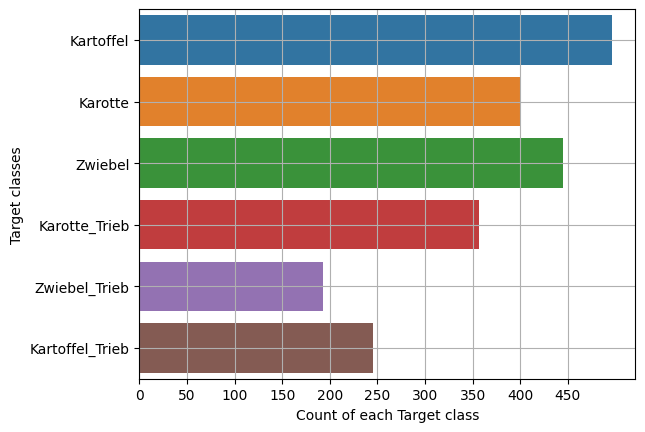

In [10]:
ax = sns.countplot(y=vegis_train['Label'], data=vegis_train)
plt.xlabel("Count of each Target class for trainset")
plt.ylabel("Target classes")
plt.grid()
plt.xticks(np.arange(0,500, step=50))
plt.show()

Die Klassenverteilung für den Testdatensatz

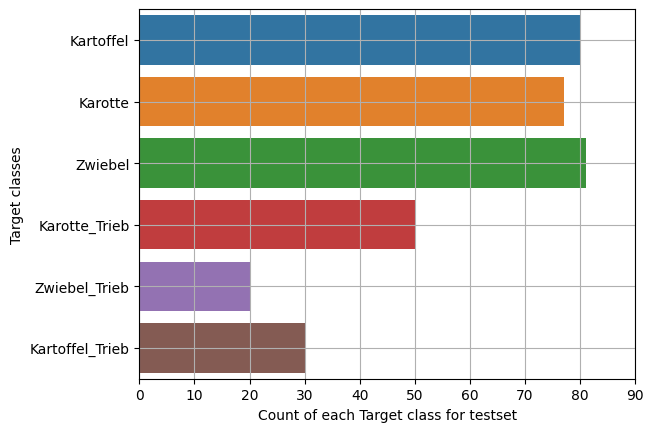

In [12]:
ax = sns.countplot(y=vegis_test['Label'], data=vegis_test)
plt.xlabel("Count of each Target class for testset")
plt.ylabel("Target classes")
plt.grid()
plt.xticks(np.arange(0,100, step=10))
plt.show()

Der Überblick über beide Datensätze zeigt :<br>
- 150 rows<br>
- 4 Independent variables to act as factors<br>
- All have same units of measurement (cm)<br>
- No missing data<br>
- Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'<br>
- No class imbalance, all target classes have equal number of rows (50 each).<br>

Scatterplots der feature
ab hier wird nur noch auf den Trainingsdatensatz eingegangen<br>
Entfernen der Spalte R, G und B

In [19]:
vegis_train_for_scatter_plot = vegis_train.drop(columns=["R", "G", "B"])

Eventuell die Label direkt in umwandeln in die Zahlen

In [45]:
vegis_train_for_scatter_plot_2 = vegis_train_for_scatter_plot.copy()
col = vegis_train_for_scatter_plot.iloc[:,-1] 
vegis_train_for_scatter_plot_2['Classes'] = col
vegis_train_for_scatter_plot_2.rename(columns={"Label": "Classes", "Classes": "Label"}, inplace=True)  # just swap the names

vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Classes'] == 'Karotte', 'Classes'] = 0
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Classes'] == 'Kartoffel', 'Classes'] = 1
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Classes'] == 'Zwiebel', 'Classes'] = 2
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Classes'] == 'Karotte_Trieb', 'Classes'] = 3
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Classes'] == 'Kartoffel_Trieb', 'Classes'] = 4
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Classes'] == 'Zwiebel_Trieb', 'Classes'] = 5

vegis_train_for_scatter_plot_2['Classes'] = vegis_train_for_scatter_plot_2['Classes'].astype('int')

vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Label'] == 'Karotte', 'Label'] = "Karotte (0)"
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Label'] == 'Kartoffel', 'Label'] = "Kartoffel (1)"
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Label'] == 'Zwiebel', 'Label'] = "Zwiebel (2)"
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Label'] == 'Karotte_Trieb', 'Label'] = "Karotte_Trieb (3)"
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Label'] == 'Kartoffel_Trieb', 'Label'] = "Kartoffel_Trieb (4)"
vegis_train_for_scatter_plot_2.loc[vegis_train_for_scatter_plot_2['Label'] == 'Zwiebel_Trieb', 'Label'] = "Zwiebel_Trieb (5)"

display(vegis_train_for_scatter_plot_2.head(3))

Hight  Width  green onion pixels  ratio area  circularity  keypoints  \
0    174    111                   0    0.747411     0.740759         39   
1     97     65                   0    0.785250     0.812063         18   
2    139    124                   0    0.826178     0.791622         36   

   mean keypoints  Classes          Label  
0       12.664070        1  Kartoffel (1)  
1        7.130874        1  Kartoffel (1)  
2        5.622304        1  Kartoffel (1)

In [41]:
vegis_train_for_scatter_plot_2['Classes'].value_counts()

Classes
1    496
2    445
0    401
3    357
4    245
5    193
Name: count, dtype: int64

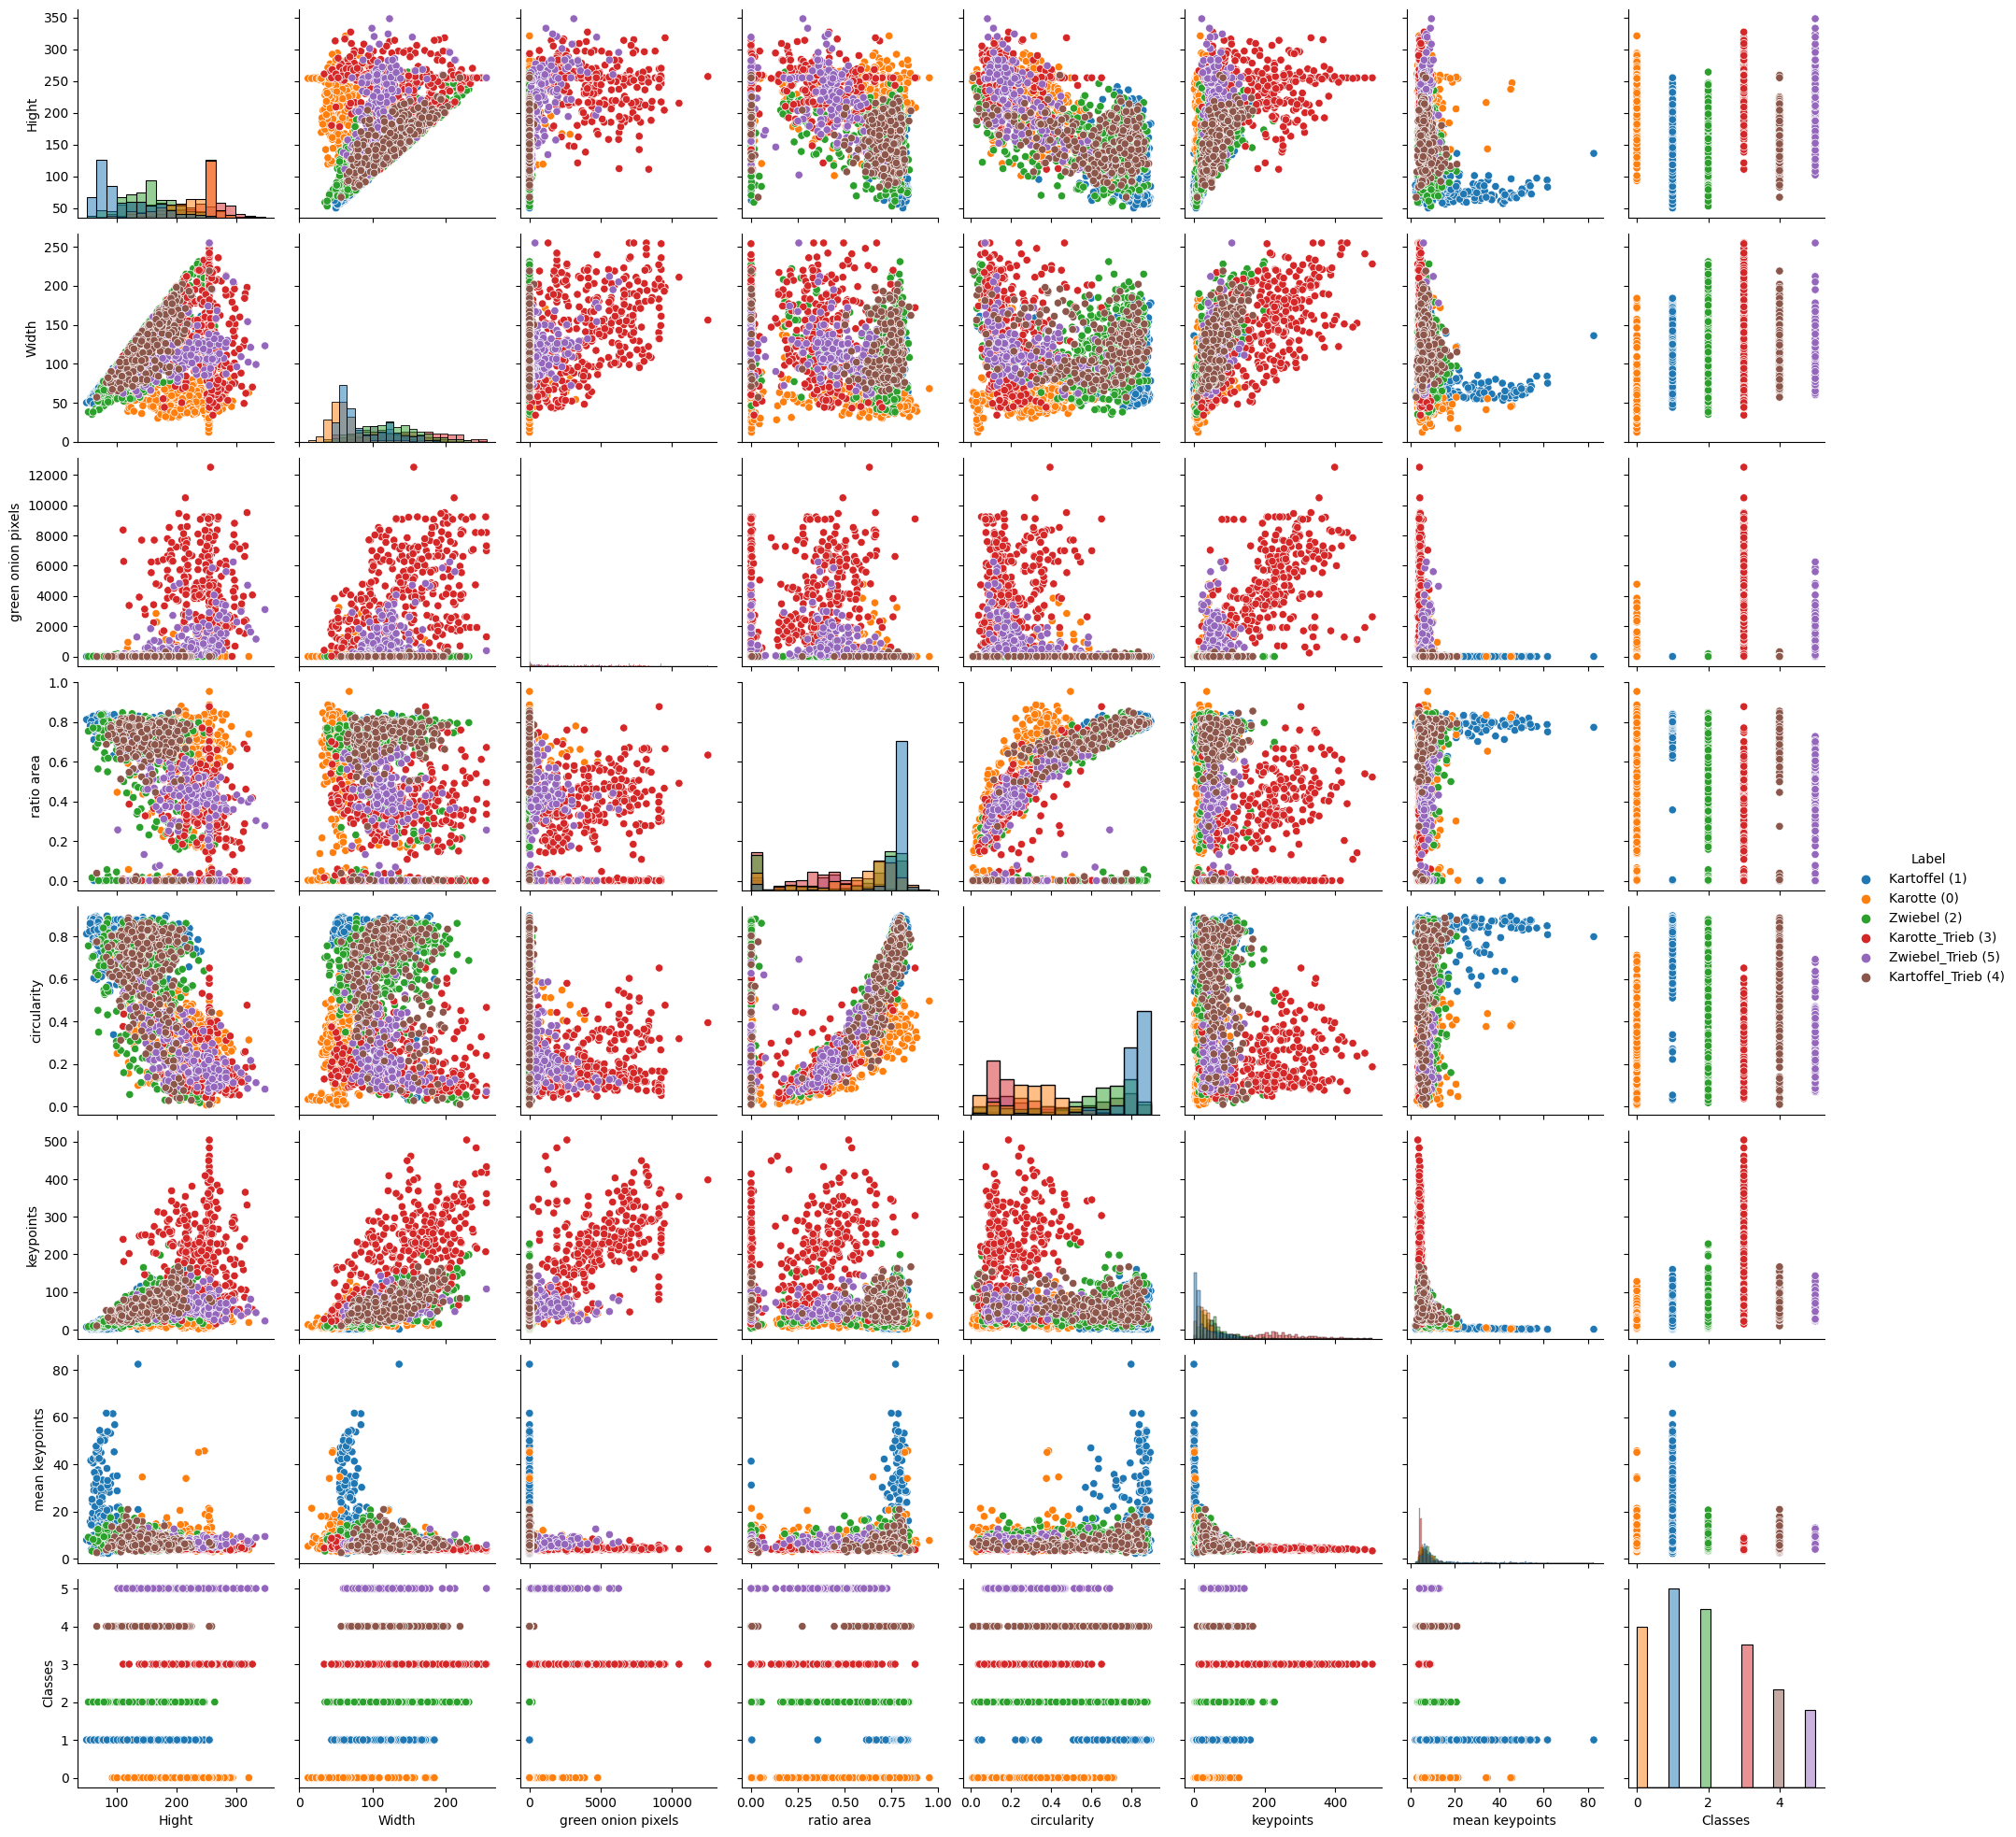

In [44]:
feature_plot = sns.pairplot(vegis_train_for_scatter_plot_2, diag_kind='hist', hue="Label")

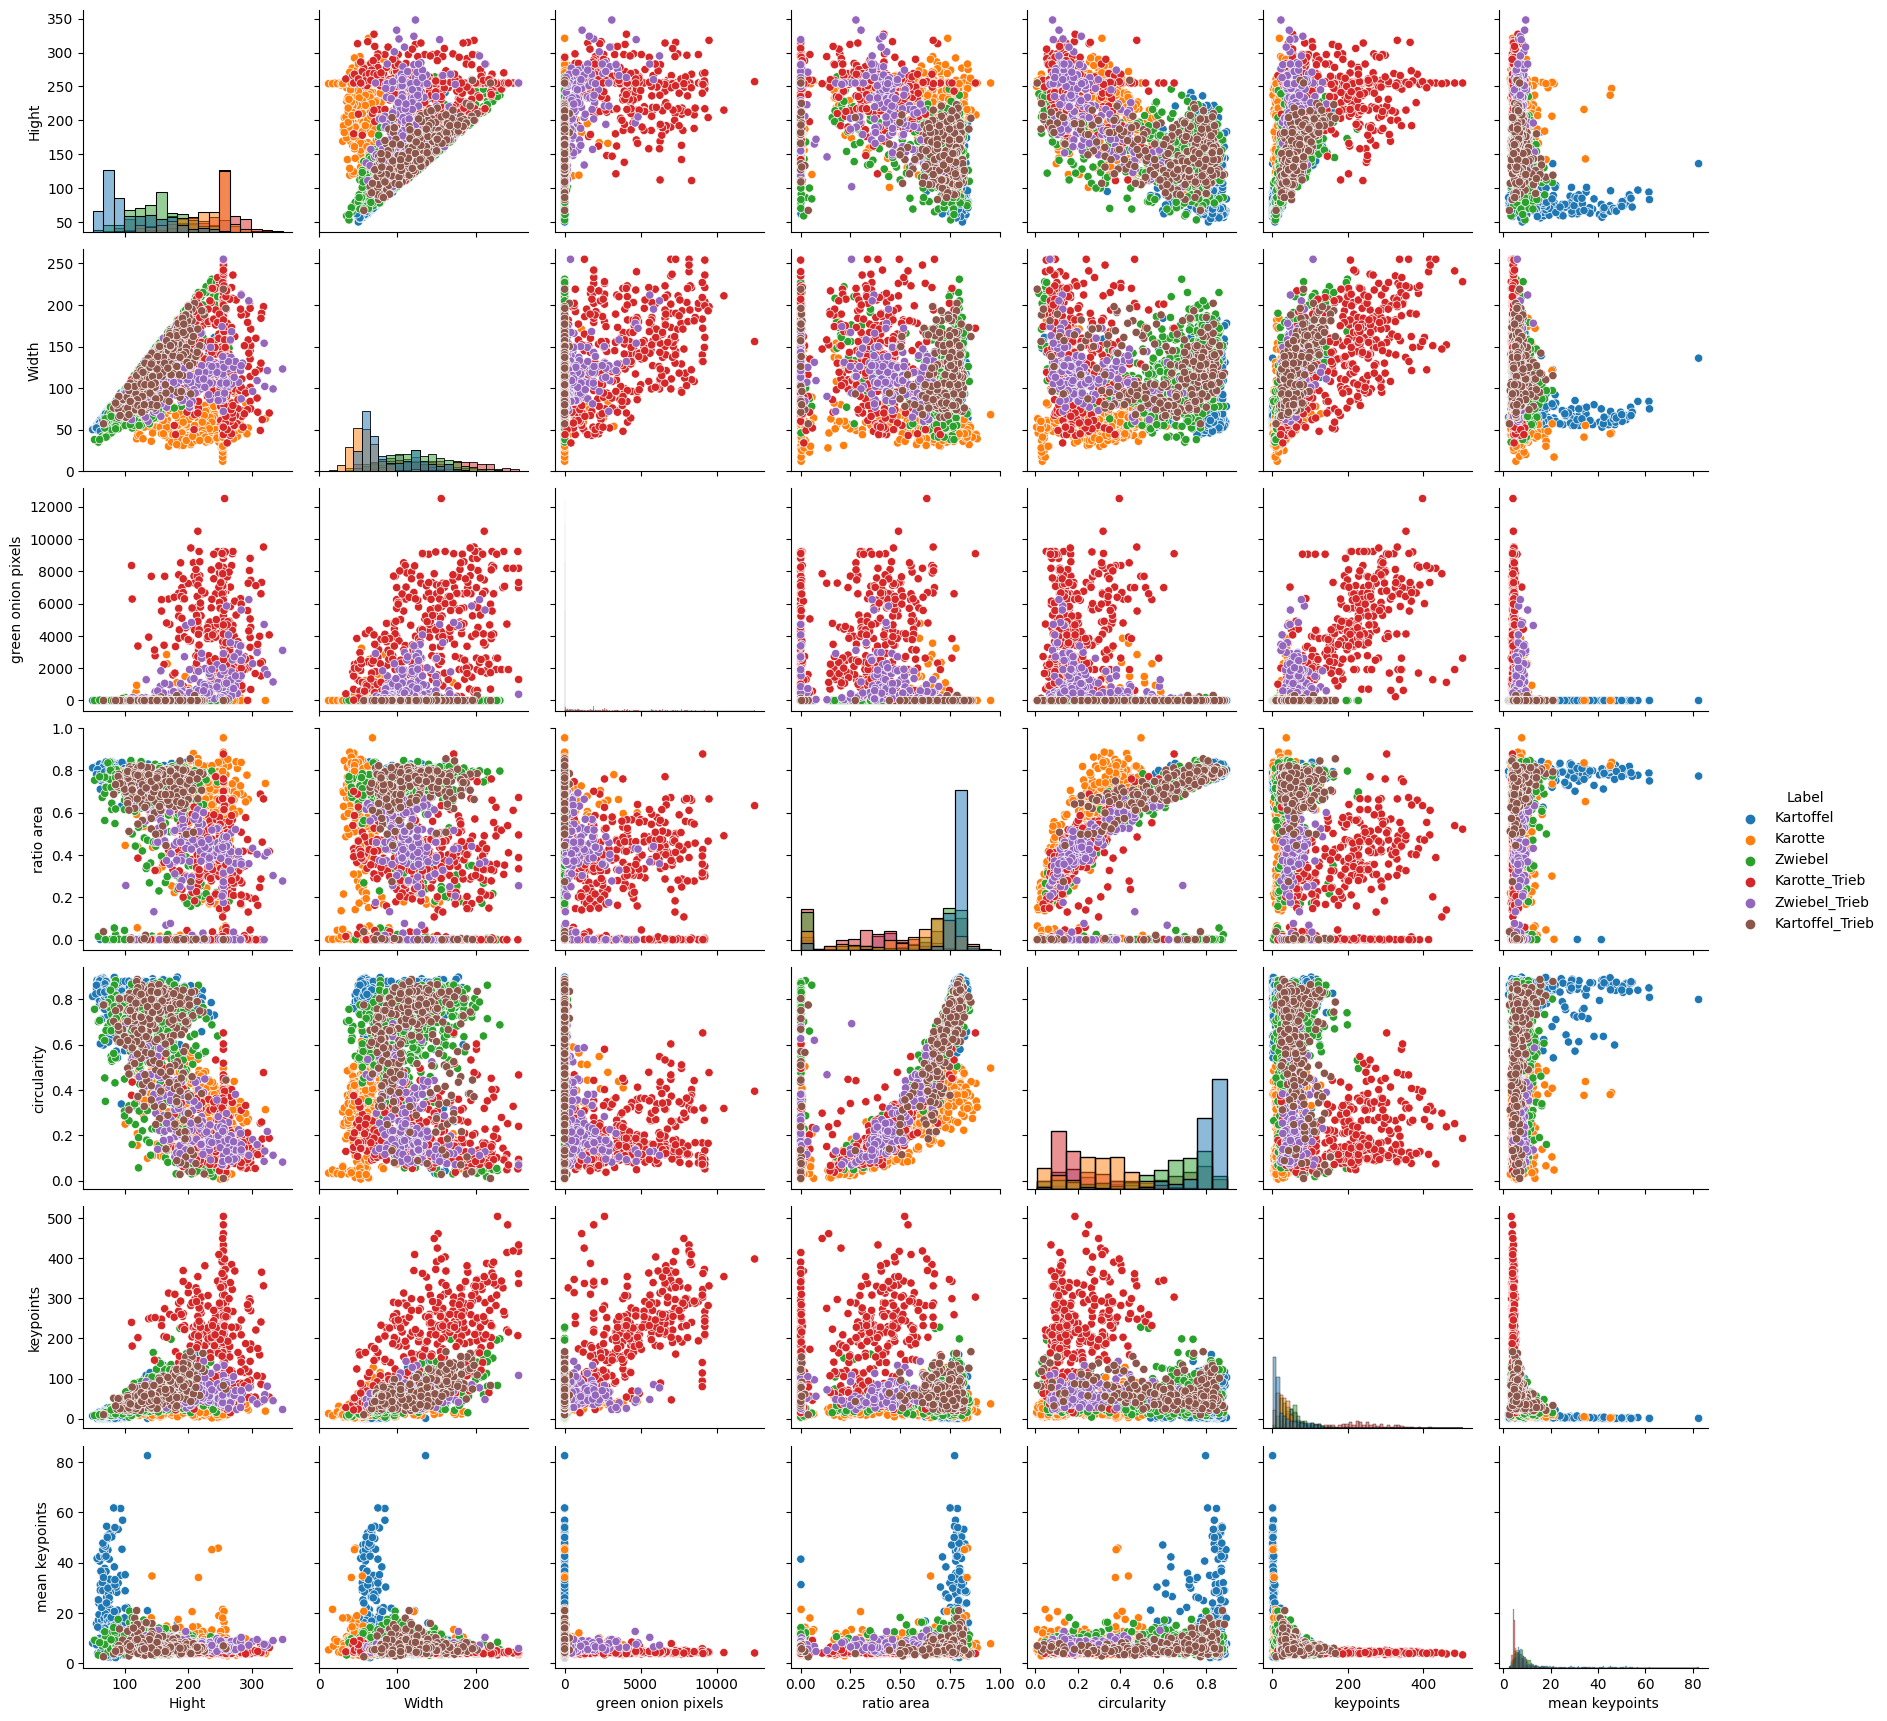

In [25]:
p = sns.pairplot(vegis_train_for_scatter_plot, diag_kind='hist', hue="Label")